# Sampling in Python

## Introduction to Sampling

### Sampling and Point Estimates

In [2]:
# pip install pyarrow

   ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.9 MB 330.3 kB/s eta 0:01:19
   ---------------------------------------- 0.1/25.9 MB 573.4 kB/s eta 0:00:45
   ---------------------------------------- 0.2/25.9 MB 1.4 MB/s eta 0:00:19
    --------------------------------------- 0.5/25.9 MB 2.3 MB/s eta 0:00:12
   - -------------------------------------- 1.0/25.9 MB 3.6 MB/s eta 0:00:08
   -- ------------------------------------- 1.5/25.9 MB 4.7 MB/s eta 0:00:06
   -- ------------------------------------- 1.9/25.9 MB 5.2 MB/s eta 0:00:05
   --- ------------------------------------ 2.2/25.9 MB 5.4 MB/s eta 0:00:05
   ---- ----------------------------------- 2.8/25.9 MB 6.1 MB/s eta 0:00:04
   ----- ---------------------------------- 3.2/25.9 MB 6.7 MB/s eta 0:00:04
   ----- -------

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spotify_population = pd.read_feather(r'./data/spotify_2000_2020.feather')
print(spotify_population.shape)
spotify_population.head()

(41656, 20)


,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [12]:
import pprint as pp
import tabulate

In [16]:

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(tabulate.tabulate(spotify_sample.head(), headers='keys', tablefmt='psql'))

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

+-------+----------------+----------------------------------------------------------------------------------------+----------------+---------------+--------------------+----------+------------+------------------------+--------------------+-------+------------+------------+--------+--------------------------------+--------------+----------------+---------------+---------+-----------+--------+
|       |   acousticness | artists                                                                                |   danceability |   duration_ms |   duration_minutes |   energy |   explicit | id                     |   instrumentalness |   key |   liveness |   loudness |   mode | name                           |   popularity | release_date   |   speechiness |   tempo |   valence |   year |
|-------+----------------+----------------------------------------------------------------------------------------+----------------+---------------+--------------------+----------+------------+-----------------

In [19]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.621790000000001


### Convenience Sampling

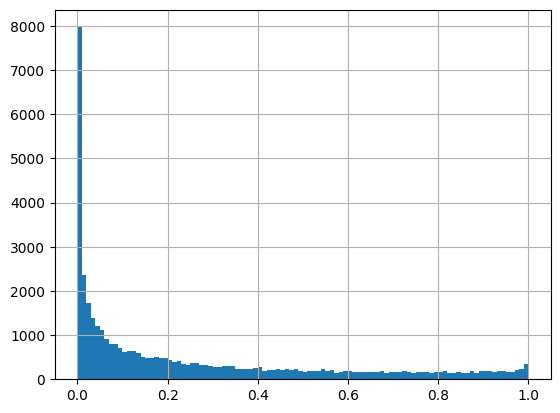

In [24]:
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show();

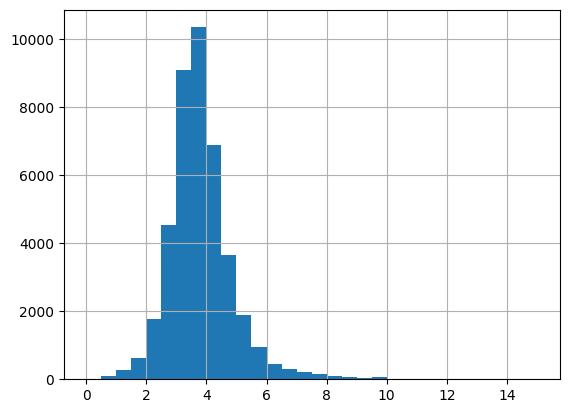

In [26]:
# Update the histogram to use spotify_mysterious_sample2
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show();

### Pseudo-random number generation

In [27]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

[ 1.8903776  -2.05128868 -0.16881283 ... -1.59378423  1.30483117
  1.7339723 ]


In [28]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[7.4404665  5.20713531 3.46681501 ... 3.99275844 0.9369629  7.55172889]


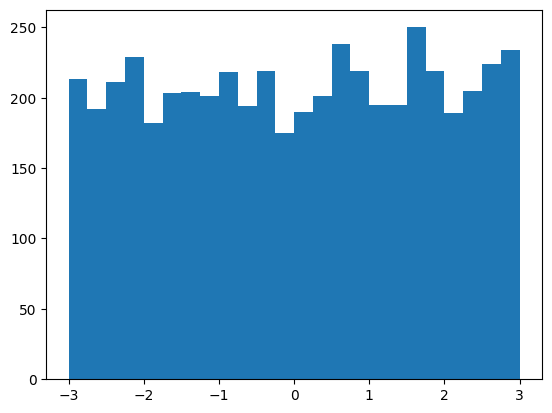

In [29]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3,3.25, 0.25))
plt.show();

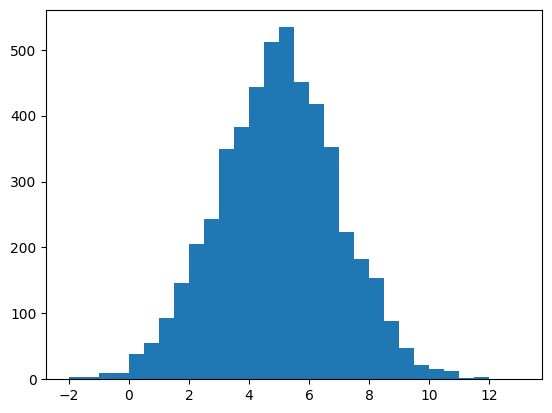

In [30]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, np.arange(-2, 13.5, 0.5))
plt.show()

## Simple random and systematic sampling